In [6]:
#로컬파일 불러오기 -> titanic.csv

import pandas as pd #pandas 불러오기

# CSV 파일 읽기
path = "C:/Users/ghom9/Downloads/titanic.csv" # titanic.csv를 저장한 경로를 입력합니다.
df = pd.read_csv(path)

# 데이터프레임(pandas에서 사용하는 2차원 데이터 구조) 확인
df.head() # 상위 5개의 행을 출력함 -> 괄호 안에 숫자를 넣으면, 숫자만큼의 행을 출력
df.columns # 컬럼의 명을 출력

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#로컬파일 불러오기 -> combined_dataset-1.xlsx

import pandas as pd #pandas 불러오기

# Xlsx 파일 읽기
path = "C:/Users/ghom9/Downloads/combined_dataset-1.xlsx" # combined_dataset-1.xlsx를 저장한 경로를 입력합니다.
df = pd.read_excel(path) # read_xlsx가 아닌 read_excel로 작성

df.head()
df.columns

Index(['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)',
       'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
       'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=2114)

In [6]:
# 웹에서 xlsx파일 불러오기
import pandas as pd

# raw URL 사용 -> https://raw.githubusercontent.com/사용자명/저장소명/브랜치명/파일경로 
# 그냥 사이트를 복붙하면 오류발생 - 위와 같은 양식으로 url작성
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/combined_dataset-1.xlsx"

df = pd.read_excel(url)
df.head()
df.columns

Index(['Num.', 'subject_ID', 'Sex(M/F)', 'Age(year)', 'Height(cm)',
       'Weight(kg)', 'Systolic Blood Pressure(mmHg)',
       'Diastolic Blood Pressure(mmHg)', 'Heart Rate(b/m)', 'BMI(kg/m^2)',
       ...
       '2091', '2092', '2093', '2094', '2095', '2096', '2097', '2098', '2099',
       '2100'],
      dtype='object', length=2114)

In [6]:
# 웹에서 CSV파일 불러오기
import pandas as pd

# raw URL 사용 -> https://raw.githubusercontent.com/사용자명/저장소명/브랜치명/파일경로 
# 그냥 사이트를 복붙하면 오류발생 - 위와 같은 양식으로 url작성
url = "https://raw.githubusercontent.com/MyungKyuYi/AI-class/main/titanic.csv"

df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 컬럼별 결측치 개수 확인 -> 결측치란 데이터셋에 값이 비어 있는 부분

print(df.isna().sum())  # 각 컬럼에 결측치가 몇 개 있는지 확인

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
# age결측치 평균값 확인하기

mean_age = df['Age'].mean()
print(mean_age)

29.69911764705882


In [9]:
# age결측치 평균값으로 채우기 

df['Age'] = df['Age'].fillna(mean_age)
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# 결측치 제거 -> Cabin, Embarked

df_cleaned = df.dropna(subset=['Cabin', 'Embarked'])
print(df_cleaned.isna().sum())  

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


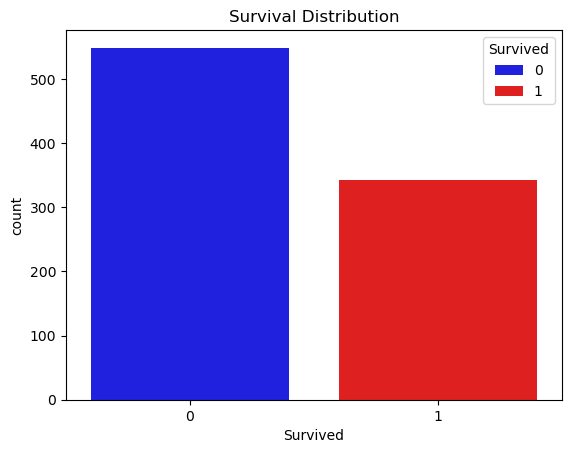

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [11]:
# 레이블 확인 (imbalanced data) -> 목표변수의 분포를 확인하여 데이터 불균형확인

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df, hue='Survived', palette=['blue', 'red']) #Survived 컬럼의 데이터 개수를 시각화
plt.title("Survival Distribution") #그래프 제목 설정
plt.show()                         #그래프 출력
print(df['Survived'].value_counts(normalize=True))

In [12]:
#불필요한 칼람 제거 

columns_to_delete = ['Name', 'Ticket', 'Cabin', 'Embarked'] # 삭제할 컬럼 리스트

df = df.drop(columns=columns_to_delete)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [13]:
print(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64


In [14]:
#엔코딩 -> 문자 데이터를 숫자로 변환하는 과정 

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
print(df['Sex'].value_counts()) 

Sex
1    577
0    314
Name: count, dtype: int64


In [15]:
# 남자는 1, 여자는 0
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


📌 Random Forest 정확도 (Accuracy): 0.8212

📌 Confusion Matrix:
[[93 12]
 [20 54]]


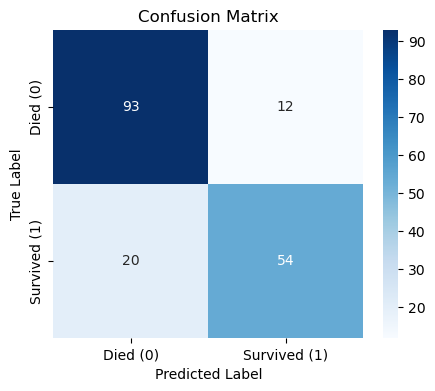

In [16]:
#RF로 분류 

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(columns=['Survived'])  # 특징 데이터 (입력값) -> Survived제외한 다른 값들
y = df['Survived']  # 타겟 데이터 (출력값)

# 📌 7. 데이터셋을 학습용(train)과 테스트용(test)으로 분할 (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📌 8. 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 📌 9. 예측 수행
y_pred = rf_model.predict(X_test)

# 📌 10. 성능 평가 - Accuracy (정확도)
accuracy = accuracy_score(y_test, y_pred)
print(f"📌 Random Forest 정확도 (Accuracy): {accuracy:.4f}")

# 📌 11. Confusion Matrix 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print("\n📌 Confusion Matrix:")
print(conf_matrix)

# 📌 12. Confusion Matrix 시각화
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Died (0)', 'Survived (1)'], yticklabels=['Died (0)', 'Survived (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


🚀 특징: Pclass 만 사용하여 모델 학습
📌 Pclass 단독 사용 - 정확도: 0.7039

📌 Confusion Matrix:
[[89 16]
 [37 37]]


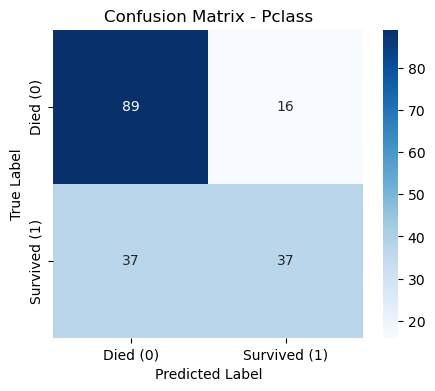


🚀 특징: Sex 만 사용하여 모델 학습
📌 Sex 단독 사용 - 정확도: 0.7821

📌 Confusion Matrix:
[[88 17]
 [22 52]]


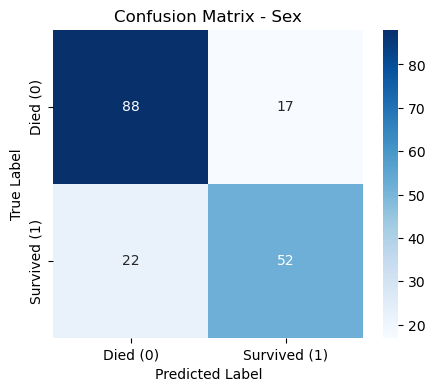


🚀 특징: Age 만 사용하여 모델 학습
📌 Age 단독 사용 - 정확도: 0.5642

📌 Confusion Matrix:
[[85 20]
 [58 16]]


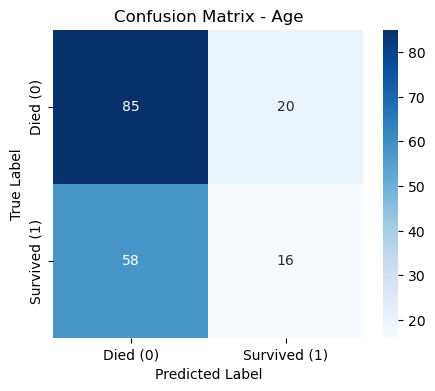


🚀 특징: SibSp 만 사용하여 모델 학습
📌 SibSp 단독 사용 - 정확도: 0.6592

📌 Confusion Matrix:
[[89 16]
 [45 29]]


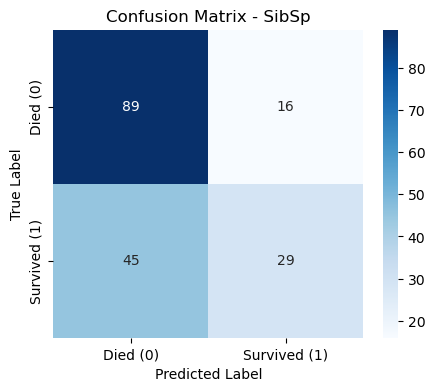


🚀 특징: Parch 만 사용하여 모델 학습
📌 Parch 단독 사용 - 정확도: 0.6089

📌 Confusion Matrix:
[[94 11]
 [59 15]]


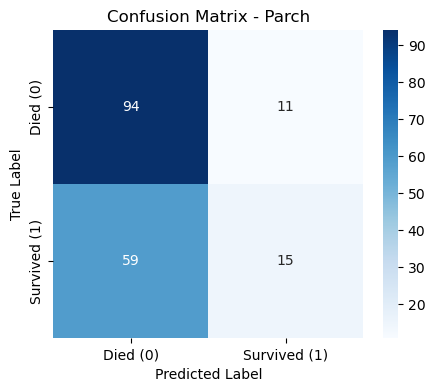


🚀 특징: Fare 만 사용하여 모델 학습
📌 Fare 단독 사용 - 정확도: 0.6983

📌 Confusion Matrix:
[[86 19]
 [35 39]]


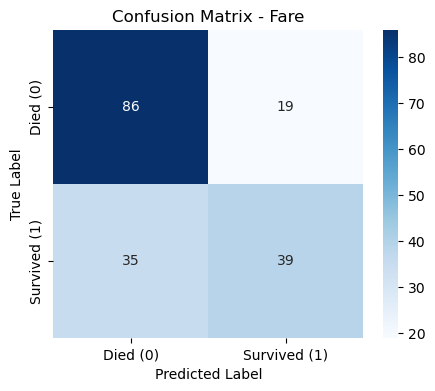

In [18]:
#RF로 분류 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 📌 사용 가능한 특징 목록 (Survived 제외)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 📌 각 특징별로 개별 모델 학습 및 평가
for feature in features:
    print(f"\n🚀 특징: {feature} 만 사용하여 모델 학습")

    # 단일 특징만 선택
    X = df[[feature]]
    y = df['Survived']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 랜덤 포레스트 모델 생성 및 학습
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {feature} 단독 사용 - 정확도: {accuracy:.4f}")

    # Confusion Matrix 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n📌 Confusion Matrix:")
    print(conf_matrix)

    # Confusion Matrix 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Died (0)', 'Survived (1)'], 
                yticklabels=['Died (0)', 'Survived (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {feature}")
    plt.show()



🚀 특징: Pclass 만 사용하여 모델 학습
📌 Pclass 단독 사용 - 정확도: 0.7039

📌 Confusion Matrix:
[[89 16]
 [37 37]]


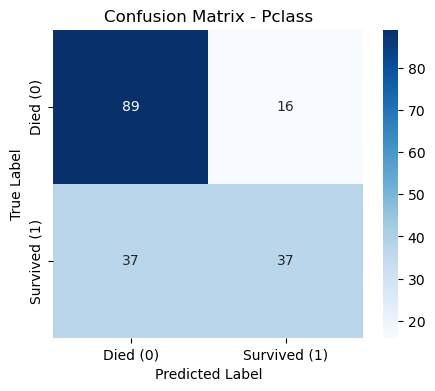


🚀 특징: Sex 만 사용하여 모델 학습
📌 Sex 단독 사용 - 정확도: 0.7821

📌 Confusion Matrix:
[[88 17]
 [22 52]]


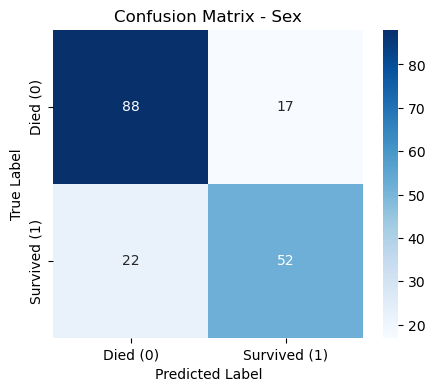


🚀 특징: Age 만 사용하여 모델 학습
📌 Age 단독 사용 - 정확도: 0.5531

📌 Confusion Matrix:
[[87 18]
 [62 12]]


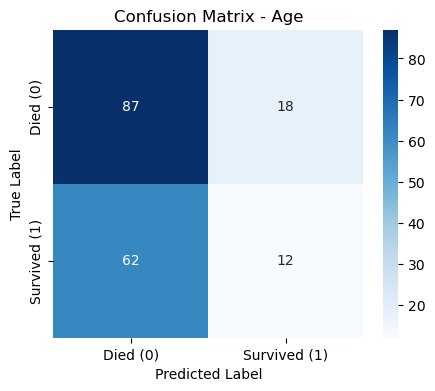


🚀 특징: SibSp 만 사용하여 모델 학습
📌 SibSp 단독 사용 - 정확도: 0.6592

📌 Confusion Matrix:
[[89 16]
 [45 29]]


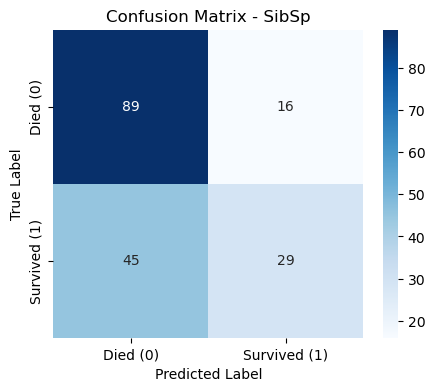


🚀 특징: Parch 만 사용하여 모델 학습
📌 Parch 단독 사용 - 정확도: 0.6089

📌 Confusion Matrix:
[[94 11]
 [59 15]]


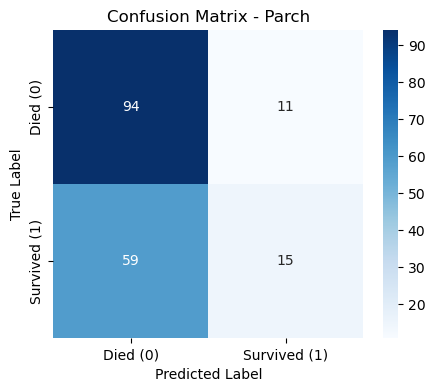


🚀 특징: Fare 만 사용하여 모델 학습
📌 Fare 단독 사용 - 정확도: 0.6927

📌 Confusion Matrix:
[[88 17]
 [38 36]]


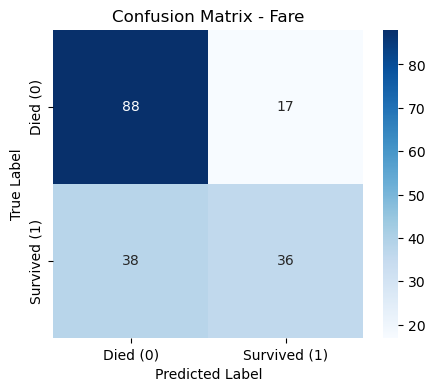

In [19]:
# DT로 분류

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 📌 사용 가능한 특징 목록 (Survived 제외)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 📌 각 특징별로 개별 모델 학습 및 평가
for feature in features:
    print(f"\n🚀 특징: {feature} 만 사용하여 모델 학습")

    # 단일 특징만 선택
    X = df[[feature]]
    y = df['Survived']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 결정 트리 생성 및 학습
    rf_model = DecisionTreeClassifier(random_state=42)
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {feature} 단독 사용 - 정확도: {accuracy:.4f}")

    # Confusion Matrix 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n📌 Confusion Matrix:")
    print(conf_matrix)

    # Confusion Matrix 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Died (0)', 'Survived (1)'], 
                yticklabels=['Died (0)', 'Survived (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {feature}")
    plt.show()


🚀 특징: Pclass 만 사용하여 모델 학습
📌 Pclass 단독 사용 - 정확도: 0.7039

📌 Confusion Matrix:
[[89 16]
 [37 37]]


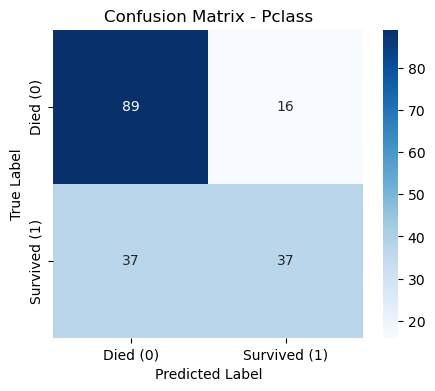


🚀 특징: Sex 만 사용하여 모델 학습
📌 Sex 단독 사용 - 정확도: 0.7821

📌 Confusion Matrix:
[[88 17]
 [22 52]]


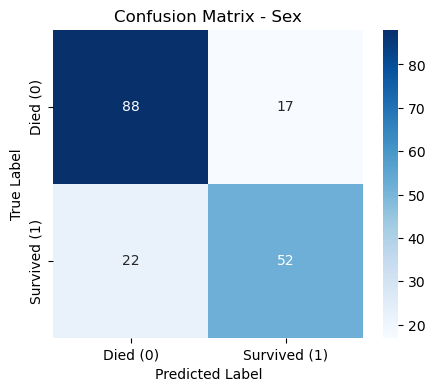


🚀 특징: Age 만 사용하여 모델 학습
📌 Age 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


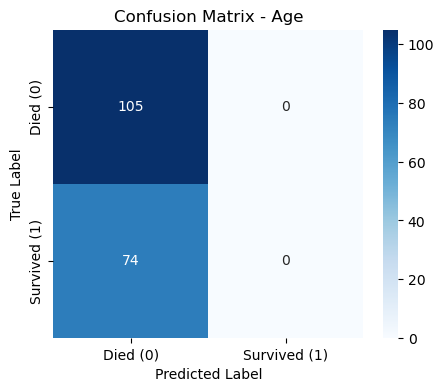


🚀 특징: SibSp 만 사용하여 모델 학습
📌 SibSp 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


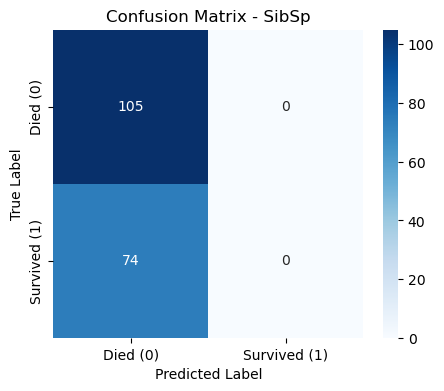


🚀 특징: Parch 만 사용하여 모델 학습
📌 Parch 단독 사용 - 정확도: 0.5698

📌 Confusion Matrix:
[[101   4]
 [ 73   1]]


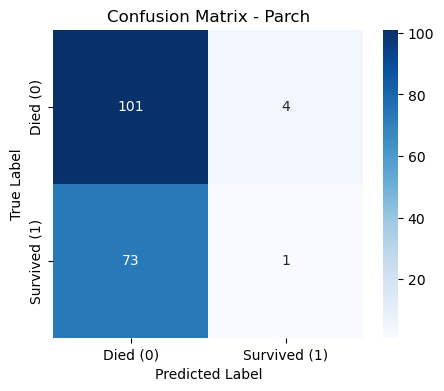


🚀 특징: Fare 만 사용하여 모델 학습
📌 Fare 단독 사용 - 정확도: 0.6536

📌 Confusion Matrix:
[[100   5]
 [ 57  17]]


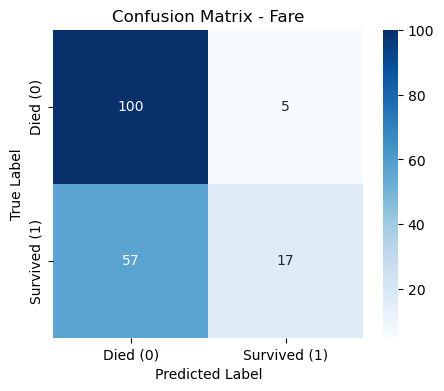

In [20]:
# LR로 분류

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# 📌 사용 가능한 특징 목록 (Survived 제외)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 📌 각 특징별로 개별 모델 학습 및 평가
for feature in features:
    print(f"\n🚀 특징: {feature} 만 사용하여 모델 학습")

    # 단일 특징만 선택
    X = df[[feature]]
    y = df['Survived']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 로지스틱 회귀 생성 및 학습
    rf_model = LogisticRegression(max_iter=1000)
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {feature} 단독 사용 - 정확도: {accuracy:.4f}")

    # Confusion Matrix 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n📌 Confusion Matrix:")
    print(conf_matrix)

    # Confusion Matrix 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Died (0)', 'Survived (1)'], 
                yticklabels=['Died (0)', 'Survived (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {feature}")
    plt.show()


🚀 특징: Pclass 만 사용하여 모델 학습
📌 Pclass 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


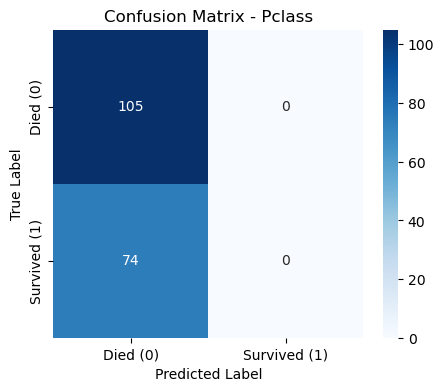


🚀 특징: Sex 만 사용하여 모델 학습
📌 Sex 단독 사용 - 정확도: 0.7821

📌 Confusion Matrix:
[[88 17]
 [22 52]]


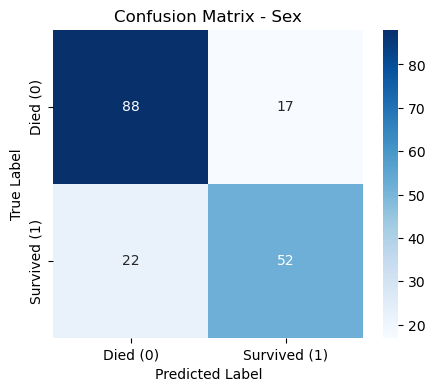


🚀 특징: Age 만 사용하여 모델 학습
📌 Age 단독 사용 - 정확도: 0.5251

📌 Confusion Matrix:
[[71 34]
 [51 23]]


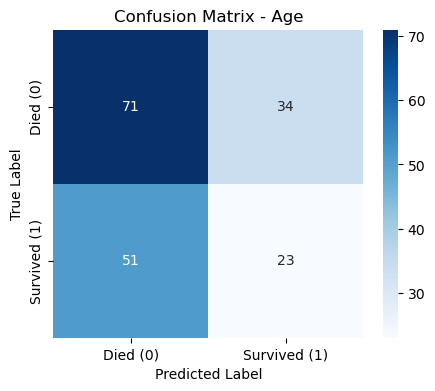


🚀 특징: SibSp 만 사용하여 모델 학습
📌 SibSp 단독 사용 - 정확도: 0.5810

📌 Confusion Matrix:
[[102   3]
 [ 72   2]]


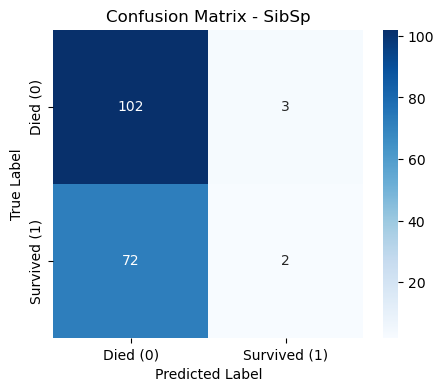


🚀 특징: Parch 만 사용하여 모델 학습
📌 Parch 단독 사용 - 정확도: 0.5922

📌 Confusion Matrix:
[[98  7]
 [66  8]]


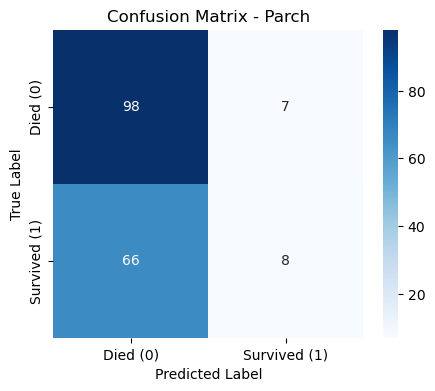


🚀 특징: Fare 만 사용하여 모델 학습
📌 Fare 단독 사용 - 정확도: 0.6983

📌 Confusion Matrix:
[[91 14]
 [40 34]]


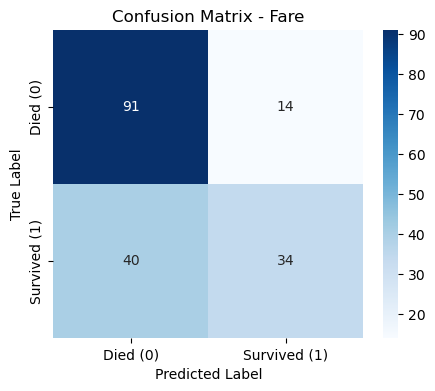

In [21]:
# KNN로 분류

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# 📌 사용 가능한 특징 목록 (Survived 제외)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 📌 각 특징별로 개별 모델 학습 및 평가
for feature in features:
    print(f"\n🚀 특징: {feature} 만 사용하여 모델 학습")

    # 단일 특징만 선택
    X = df[[feature]]
    y = df['Survived']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # KNN 및 학습
    rf_model = KNeighborsClassifier(n_neighbors=5)
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {feature} 단독 사용 - 정확도: {accuracy:.4f}")

    # Confusion Matrix 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n📌 Confusion Matrix:")
    print(conf_matrix)

    # Confusion Matrix 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Died (0)', 'Survived (1)'], 
                yticklabels=['Died (0)', 'Survived (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {feature}")
    plt.show()


🚀 특징: Pclass 만 사용하여 모델 학습
📌 Pclass 단독 사용 - 정확도: 0.6760

📌 Confusion Matrix:
[[70 35]
 [23 51]]


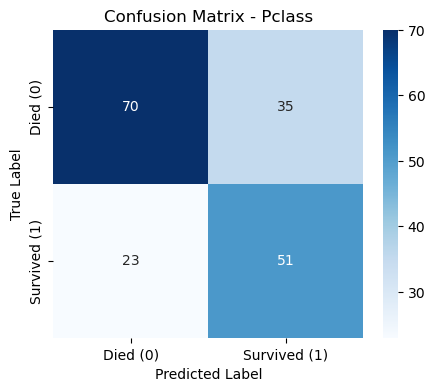


🚀 특징: Sex 만 사용하여 모델 학습
📌 Sex 단독 사용 - 정확도: 0.7821

📌 Confusion Matrix:
[[88 17]
 [22 52]]


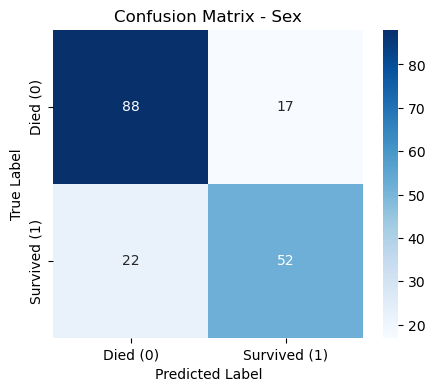


🚀 특징: Age 만 사용하여 모델 학습
📌 Age 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


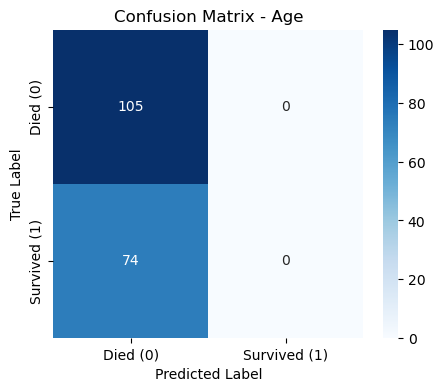


🚀 특징: SibSp 만 사용하여 모델 학습
📌 SibSp 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


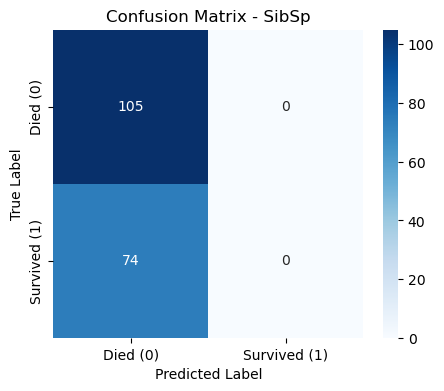


🚀 특징: Parch 만 사용하여 모델 학습
📌 Parch 단독 사용 - 정확도: 0.5866

📌 Confusion Matrix:
[[105   0]
 [ 74   0]]


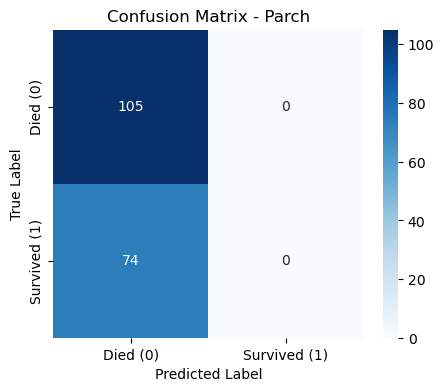


🚀 특징: Fare 만 사용하여 모델 학습
📌 Fare 단독 사용 - 정확도: 0.6425

📌 Confusion Matrix:
[[103   2]
 [ 62  12]]


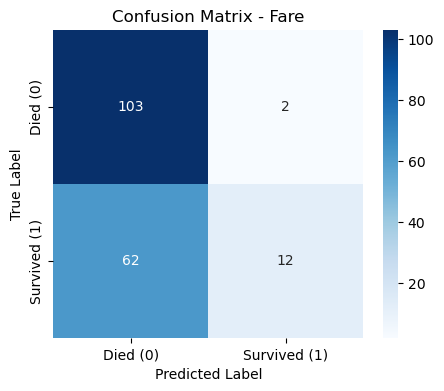

In [22]:
# SVM로 분류

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# 📌 사용 가능한 특징 목록 (Survived 제외)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

# 📌 각 특징별로 개별 모델 학습 및 평가
for feature in features:
    print(f"\n🚀 특징: {feature} 만 사용하여 모델 학습")

    # 단일 특징만 선택
    X = df[[feature]]
    y = df['Survived']

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # SVM 생성 및 학습
    rf_model = SVC(kernel='linear')
    rf_model.fit(X_train, y_train)

    # 예측 수행
    y_pred = rf_model.predict(X_test)

    # 정확도 출력
    accuracy = accuracy_score(y_test, y_pred)
    print(f"📌 {feature} 단독 사용 - 정확도: {accuracy:.4f}")

    # Confusion Matrix 출력
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("\n📌 Confusion Matrix:")
    print(conf_matrix)

    # Confusion Matrix 시각화
    plt.figure(figsize=(5,4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=['Died (0)', 'Survived (1)'], 
                yticklabels=['Died (0)', 'Survived (1)'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {feature}")
    plt.show()